In [2]:
# Import data from CSV file
# Practice-level data, range December 2018 to November 2019
# Other category (as per BNF 040304) contains venlafaxine, mirtazapine, and duloxetine

import pandas as pd
import numpy as np
import os
# from ebmdatalab import bq

os.chdir("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Data")

df1 = pd.read_csv("antidepressants_last_12_months.csv")
df1 = df1.rename(columns={"practice":"Practice","month":"Month","total_items":"Total","total_cost":"Cost","MAOi":"MAOI"})
print("No of practices: ", df1["Practice"].nunique())
df1.head()

No of practices:  6807


,Practice,Other,Venlafaxine,Mirtazapine,Duloxetine,MAOI,Isocarboxazid,Iproniazid,Tranylcypromine,Moclobemide,...,Tricyclics,Trimipramine,Dosulepin,Amitriptyline,Trazodone,Lofepramine,Maprotiline,Mianserin,Total,Cost
0,A81001,670,143,458,64,0,0,0,0,0,...,354,2,12,255,21,15,0,0,1842,3612.10418
1,A81002,2089,543,1000,506,0,0,0,0,0,...,1826,3,75,1416,222,26,0,0,8885,16738.55482
2,A81004,918,175,487,255,2,2,0,0,0,...,944,1,15,793,84,7,0,0,3917,11228.32966
3,A81005,642,176,364,102,3,0,0,0,0,...,493,0,3,393,65,14,0,0,2791,4829.95934
4,A81006,1483,368,858,255,2,0,0,0,0,...,1592,0,26,1357,130,8,0,0,7179,12693.57273


### Practice-level calculations

In [3]:
# Calculate class totals

df1["Others"] = df1["Other"] - df1["Venlafaxine"] - df1["Duloxetine"] + df1["Maprotiline"] + df1["Mianserin"] + df1["Trazodone"]
df1["SSRI"] = df1.loc[:,["Citalopram","Escitalopram","Fluoxetine","Fluvoxamine","Paroxetine","Sertraline"]].sum(axis = 1)
df1["SNRI"] = df1.loc[:,["Duloxetine","Venlafaxine"]].sum(axis = 1)
df1["Tricyclic"] = df1["Tricyclics"] - df1["Maprotiline"] - df1["Mianserin"] - df1["Trazodone"]
df1["Test"] = df1["Total"] - df1["Others"] - df1["SSRI"] - df1["SNRI"] - df1["Tricyclic"] - df1["MAOI"]
print(df1.loc[:,"Test"].sum(axis=0))

0


## Join practices to CCGs

In [4]:
# GBQ_PROJECT_ID = '620265099307'
# # load practice/ccg mappings
# qc = '''
# SELECT 
#   code, ccg_id
# FROM  `hscic.practices` c 
# '''

ccgs = pd.read_csv("antidepressants_practice_ccg_map.csv")
ccgs.head()

,code,ccg_id
0,01Y999,NaN
1,Y01254,NaN
2,L81674,NaN
3,F82036,NaN
4,09X999,NaN


In [5]:
dfc = df1.merge(ccgs, left_on="Practice", right_on="code", how="inner")
# group to ccgs
data = dfc.groupby("ccg_id").sum() 
data.head()

,Other,Venlafaxine,Mirtazapine,Duloxetine,MAOI,Isocarboxazid,Iproniazid,Tranylcypromine,Moclobemide,Phenelzine,...,Lofepramine,Maprotiline,Mianserin,Total,Cost,Others,SSRI,SNRI,Tricyclic,Test
ccg_id,,,,,,,,,,,,,,,,,,,,,
00C,11945,2337,6926,2399,31,0,0,0,13,18,...,128,0,0,51378,91177.62613,10354,26447,4736,9810,0
00D,38911,8264,22308,7545,22,0,0,7,4,11,...,541,0,0,163979,272558.20752,31240,81341,15809,35567,0
00J,30585,7527,17317,5067,33,0,0,6,4,23,...,589,0,0,131526,254059.33824,25244,64882,12594,28773,0
00K,28414,6822,16279,5024,23,0,0,0,2,21,...,369,0,0,126030,247322.25360,20176,68685,11846,25300,0
00L,33753,9035,18019,6073,109,0,0,2,49,58,...,636,0,25,147428,296957.17419,23718,76395,15108,32098,0


In [6]:
# Calculate percentages for antidepressants of particular interest

data["Paroxetine (%)"] = 100*data["Paroxetine"]/data["Total"]
data["Dosulepin (%)"] = 100*data["Dosulepin"]/data["Total"]
data["Trimipramine (%)"] = 100*data["Trimipramine"]/data["Total"]
data["MAOI (%)"] = 100*data["MAOI"]/data["Total"]
data.head()

,Other,Venlafaxine,Mirtazapine,Duloxetine,MAOI,Isocarboxazid,Iproniazid,Tranylcypromine,Moclobemide,Phenelzine,...,Cost,Others,SSRI,SNRI,Tricyclic,Test,Paroxetine (%),Dosulepin (%),Trimipramine (%),MAOI (%)
ccg_id,,,,,,,,,,,,,,,,,,,,,
00C,11945,2337,6926,2399,31,0,0,0,13,18,...,91177.62613,10354,26447,4736,9810,0,0.871969,0.533302,0.000000,0.060337
00D,38911,8264,22308,7545,22,0,0,7,4,11,...,272558.20752,31240,81341,15809,35567,0,1.312973,0.417127,0.043908,0.013416
00J,30585,7527,17317,5067,33,0,0,6,4,23,...,254059.33824,25244,64882,12594,28773,0,1.633137,0.367228,0.012165,0.025090
00K,28414,6822,16279,5024,23,0,0,0,2,21,...,247322.25360,20176,68685,11846,25300,0,1.112434,0.565738,0.016663,0.018250
00L,33753,9035,18019,6073,109,0,0,2,49,58,...,296957.17419,23718,76395,15108,32098,0,1.825298,0.683045,0.011531,0.073934


## Join to CCG names

In [7]:
d2 = data.copy().reset_index()
# names = pd.read_csv('ccg_for_map.csv')
# qc = '''
# SELECT 
#   code, name
# FROM  `hscic.ccgs` c 
# WHERE org_type = "CCG"
# '''

names = pd.read_csv("antidepressants_ccgs.csv")
d3 = d2.merge(names[['code','name']],left_on="ccg_id",right_on="code")

d3.head() # 195 rows

,ccg_id,Other,Venlafaxine,Mirtazapine,Duloxetine,MAOI,Isocarboxazid,Iproniazid,Tranylcypromine,Moclobemide,...,SSRI,SNRI,Tricyclic,Test,Paroxetine (%),Dosulepin (%),Trimipramine (%),MAOI (%),code,name
0,00C,11945,2337,6926,2399,31,0,0,0,13,...,26447,4736,9810,0,0.871969,0.533302,0.000000,0.060337,00C,NHS DARLINGTON CCG
1,00D,38911,8264,22308,7545,22,0,0,7,4,...,81341,15809,35567,0,1.312973,0.417127,0.043908,0.013416,00D,"NHS DURHAM DALES, EASINGTON AND SEDGEFIELD CCG"
2,00J,30585,7527,17317,5067,33,0,0,6,4,...,64882,12594,28773,0,1.633137,0.367228,0.012165,0.025090,00J,NHS NORTH DURHAM CCG
3,00K,28414,6822,16279,5024,23,0,0,0,2,...,68685,11846,25300,0,1.112434,0.565738,0.016663,0.018250,00K,NHS HARTLEPOOL AND STOCKTON-ON-TEES CCG
4,00L,33753,9035,18019,6073,109,0,0,2,49,...,76395,15108,32098,0,1.825298,0.683045,0.011531,0.073934,00L,NHS NORTHUMBERLAND CCG


## Plot maps

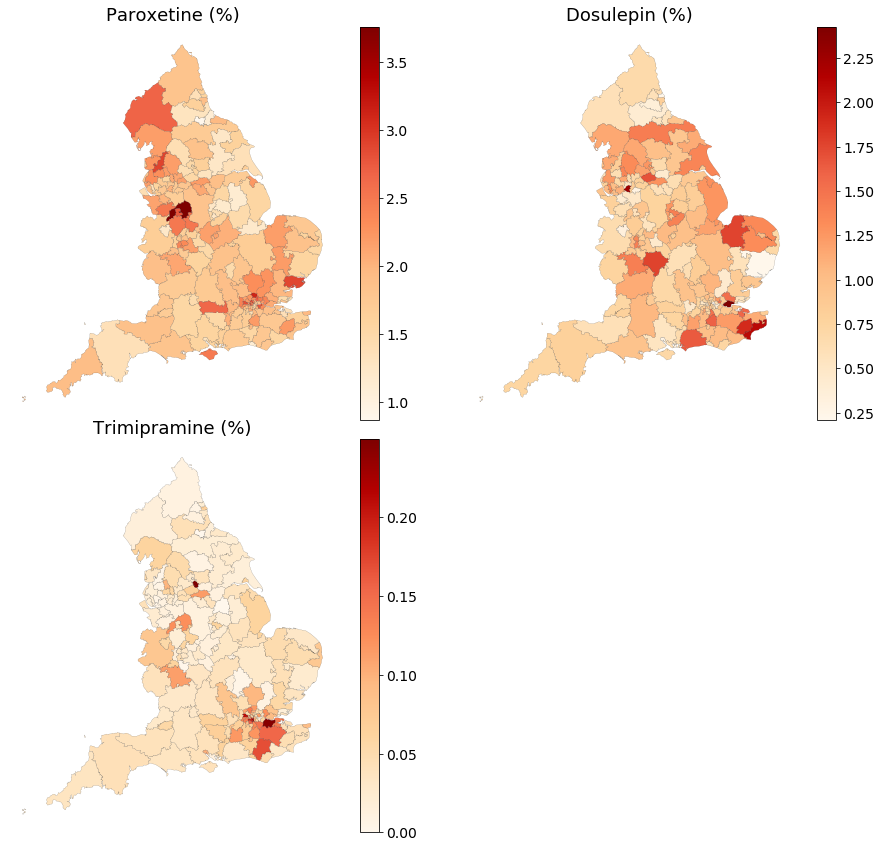

In [16]:
import matplotlib.gridspec as gridspec
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# from our API https://openprescribing.net/api/1.0/org_location/?org_type=ccg
# ccgs = pd.read_csv("antidepressants_practice_ccg_map.csv")
ccgs = gpd.read_file('ccgs.json').set_index('name')

ccgs = ccgs[~ccgs['geometry'].isnull()]  # remove ones without geometry - these are federations rather than individual CCGs
gdf = ccgs.merge(d3)

# set sort order of measures manually, and add grid refs to position each subplot:
s = [(0,"Paroxetine (%)",0,0,''),      (1,"Dosulepin (%)",0,1,''), 
     (2,"Trimipramine (%)",1,0,'')
    ]

fig = plt.figure(figsize=(16,30))
gs = gridspec.GridSpec(4,2)  # grid layout for subplots

for i in s:
    ax = plt.subplot(gs[i[2], i[3]])  # position of subplot in grid using coordinates listed in s
    gdf.plot(ax=ax,column=i[1],  edgecolor='black', linewidth=0.1, legend=True, cmap='OrRd')
    ax.set_aspect(1.63)
    ax.set_title(i[4]+i[1],size = 18)
    cb_ax = fig.axes[2*(i[0])+1] # extract legend labels from list of axis/legend labels
    cb_ax.tick_params(labelsize=14)
    plt.axis('off')

plt.subplots_adjust(wspace = 0.05,hspace = 0.05)

plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure S6.pdf",format="pdf",bbox_inches='tight')

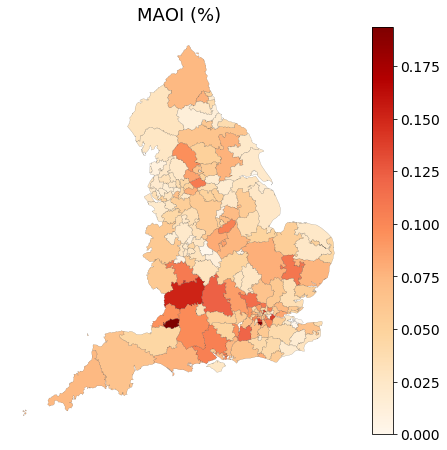

In [17]:
# ccgs = gpd.read_file('ccgs.json').set_index('name')

# set sort order of measures manually, and add grid refs to position each subplot:
s = [(0,"MAOI (%)",0,0,'')
    ]

fig = plt.figure(figsize=(8,7.5))
gs = gridspec.GridSpec(1,1)  # grid layout for subplots

for i in s:
    ax = plt.subplot(gs[i[2], i[3]])  # position of subplot in grid using coordinates listed in s
    gdf.plot(ax=ax,column=i[1],  edgecolor='black', linewidth=0.1, legend=True, cmap='OrRd')
    ax.set_aspect(1.63)
    ax.set_title(i[4]+i[1],size = 18)
    cb_ax = fig.axes[2*(i[0])+1] # extract legend labels from list of axis/legend labels
    cb_ax.tick_params(labelsize=14)
    plt.axis('off')

plt.subplots_adjust(wspace = 0.05,hspace = 0.05)

plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure S5.pdf",format="pdf",bbox_inches='tight')